In [16]:
#Multiple regression is like linear regression, but with more than one independent value, meaning that we try to predict a value based on two or more variables.
import numpy as np
import matplotlib.pyplot as plt
from numpy import savetxt
import pickle
import csv
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.utils import shuffle
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import random

from sklearn import preprocessing
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from numpy import savetxt
import pickle
import csv
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.utils import shuffle
import sklearn.metrics as sm

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score


#xgboost
import multiprocessing
from xgboost import plot_tree
import xgboost as xgb
import pandas as pd
import numpy as np
import pickle 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
import warnings
warnings.filterwarnings("ignore")
import datetime
starttime = datetime.datetime.now()

In [2]:
with open("/Users/laianavarroolivella/Proyectos/EEG/4.Classifitator/RearengeEpochsForregetion/list_final_EO.txt", "rb") as fp:   
    withEpoch = pickle.load(fp)
with open("/Users/laianavarroolivella/Proyectos/EEG/1.dataToBrainReagions/sorted_list_EC.txt", "rb") as fp:   # Unpickling
    sorted_list_EC = pickle.load(fp)

In [3]:
#Import the data to analise
#Open the file in universal line ending mode 
with open('/Users/laianavarroolivella/Proyectos/EEG/Files_EEG/TEIQue-SF.csv', 'rU') as infile:
  # read the file as a dictionary for each row ({header : value})
  data = {}
  reader = csv.DictReader(infile)
  for row in reader:
    for header, value in row.items():
      try:
        data[header].append(value)
      except KeyError:
        data[header] = [value]

# extract the variables you want
names = data['ID']
TeiQueSF_emotionality = data['TeiQueSF_emotionality']
TeiQueSF_wellBeing = data['TeiQueSF_well_being']

In [4]:
del withEpoch[151]
del withEpoch[151]

In [5]:
longimin = 600
for i in withEpoch:
    if len(i)<longimin:
        longimin=len(i)

In [6]:
Data = []
for i in withEpoch:
    Data.append(i[:400])

In [7]:
del sorted_list_EC[151]
del sorted_list_EC[151]

In [8]:
xCorr = []
for e in range(0,len(sorted_list_EC)):       #For each frequency band:
    hename = sorted_list_EC[e]   #Select the name of the patient
    hename = str(hename[:-7])  #Select only the number witout the extension 
    if hename in names:    #If this is in the testNames:
        indices = [i for i, s in enumerate(names) if hename in s] #Get the position of the testNames
        x = (float(TeiQueSF_wellBeing[int(indices[0])])) #Get the value of the patient in the test selected
        xCorr.append(x) #Add it in to the xCorr
    else:
        print("No esta"+hename)

In [9]:
normalizedData = []
for i in Data:
    x=[]
    normalized_arr = preprocessing.normalize([i])
    x.append(normalized_arr)
    normalizedData.append(normalized_arr[0])

In [10]:
#Data
X=np.array(normalizedData)
print(type(X))
print(X.shape)

<class 'numpy.ndarray'>
(185, 400)


In [11]:
#Lavels
Lavels2 = []
for i  in xCorr:
    if i>5.5:
        Lavels2.append(int(0))
    if i<=5.5:
        Lavels2.append(int(1))

Y = np.array(xCorr)



In [12]:
xin = list(range(50))
for i in range(1,8):
    print("**************************************************** "+'0.'+str(i)) #PRINT THE PARTITION OF THE DATA
    numpase = 0 #COUNTER OF THE EPOCHS THAT PAS THE 0.55 ACCURACY
    accur = [] #SAVE THE ACCURACY
    for t in range(0,50):
        print("     --")
        c = list(zip(X, Y)) # Zip so went we shuffle it dosent disarrange
        random.shuffle(c) #MIXT DATA
        DX, DY = zip(*c) #UNZIP
        DX = np.array(DX) #TRANSFORM TO ARRAY
        DY = np.array(DY)
        trainX, testX, y_train, y_test = train_test_split(DX, DY, test_size=float('0.'+str(i))) #DEVIDE DATA
        # Create an object, or instance, of the class.
        meanXpatient = []
        X_train = (trainX - np.mean(trainX)) / np.std(trainX)
        X_test = (testX - np.mean(testX)) / np.std(testX)

        clf = linear_model.LinearRegression()
        # Train it
        #fitting (learning) the parameters of a model in sklearn is fit(X, y).
        print(clf.fit(X_train, y_train))
        clf.coef_
        clf.intercept_
        clf.score(X_train, y_train)
        #predict the class of the test data
        #sklearn is predict(X)
        prediction = (clf.predict(X_test))
        if float(round(sm.mean_absolute_error(y_test, prediction), 2))<0.60:
            print('Predictet: {}\n'.format(prediction) )
            print('What it should be: ', y_test)
            print('Correlation: ', np.corrcoef(y_test, prediction))
            corre = np.corrcoef(y_test, prediction)
            # Then, compute the classification accuracy obtained.
            print("Mean absolute error =", round(sm.mean_absolute_error(y_test, prediction), 2)) 
            print("Mean squared error =", round(sm.mean_squared_error(y_test, prediction), 2)) 
            save_meanabsoluteerror.append(round(sm.mean_absolute_error(y_test, prediction), 2))
            print("Median absolute error =", round(sm.median_absolute_error(y_test, prediction), 2)) 
            print("Explain variance score =", round(sm.explained_variance_score(y_test, prediction), 2)) 
            print("R2 score =", round(sm.r2_score(y_test, prediction), 2))
            print(' ')
            print(' ')
            print('-------------- ')
            numpase=numpase+1
            accur.append(float(round(sm.mean_absolute_error(y_test, prediction), 2)))            
        else:
            accur.append(float(round(sm.mean_absolute_error(y_test, prediction), 2)))
            print('     Bad accu')
    if numpase>25:
        fig = plt.figure()
        ax = fig.add_axes([0,0,1,1])
        ax.bar(xin,accur)
        plt.show()
    else:
        print('************************************************ The half of the iterations dont past the .6 accur')
    print('Num de acc que pasa de 0.5: ',numpase)

**************************************************** 0.1
     --
LinearRegression()
     Bad accu
     --
LinearRegression()
     Bad accu
     --
LinearRegression()
     Bad accu
     --
LinearRegression()
     Bad accu
     --
LinearRegression()
     Bad accu
     --
LinearRegression()
     Bad accu
     --
LinearRegression()
     Bad accu
     --
LinearRegression()
     Bad accu
     --
LinearRegression()
     Bad accu
     --
LinearRegression()
     Bad accu
     --
LinearRegression()
     Bad accu
     --
LinearRegression()
     Bad accu
     --
LinearRegression()
     Bad accu
     --
LinearRegression()
     Bad accu
     --
LinearRegression()
     Bad accu
     --
LinearRegression()
     Bad accu
     --
LinearRegression()
     Bad accu
     --
LinearRegression()
     Bad accu
     --
LinearRegression()
     Bad accu
     --
LinearRegression()
     Bad accu
     --
LinearRegression()
     Bad accu
     --
LinearRegression()
     Bad accu
     --
LinearRegression()
     Bad accu


In [13]:
Lavels3 =[]
X3 = []
r=0
for i  in range(0,len(xCorr)):
    if xCorr[i]>4.5 and r<35:
        Lavels3.append(int(0))
        X3.append(X[i])
        r=r+1
    if xCorr[i]<=4.5:
        Lavels3.append(int(1))
        X3.append(X[i])


In [14]:
#Linear SVC
for i in range(1,8):
    print("**************************************************** 0."+str(i))
    numpase = 0
    accur = []
    xin = []
    for t in range(0,50):

        print("     --")
        c = list(zip(X3, Lavels3))

        random.shuffle(c)

        DX, DY = zip(*c)
        X_train, X_test, y_train, y_test = train_test_split(DX, DY, test_size=float('0.'+str(i)))
        X_train = (X_train - np.mean(X_train)) / np.std(X_train)
        X_test = (X_test - np.mean(X_test)) / np.std(X_test)

        # Create an object, or instance, of the class.
        # Train it
        # Adjust the parameters so it can predict the correct class as accurately.
        clf = LinearSVC(penalty='l2', multi_class='crammer_singer',)
        #fitting (learning) the parameters of a model in sklearn is fit(X, y).
        print(clf.fit(X_train, y_train))
        clf.coef_
        clf.intercept_
        clf.score(X_train, y_train)
        #predict the class of the test data
        #sklearn is predict(X)
        prediction = (clf.predict(X_test))
        try:
            if float(accuracy_score(y_test, prediction))>0.6:
                print('     Predictet: {}'.format(prediction) )
                print('     El q ha de ser: ',y_test)
                # Then, compute the classification accuracy obtained.
                print('     Accuracy: ', accuracy_score(y_test, prediction))

                print('     Roc: ',roc_auc_score(y_test, prediction))

                print('     Recall: ',recall_score(y_test, prediction))
                print(' ')
                numpase=numpase+1
                accur.append(float(accuracy_score(y_test, prediction)))
                xin.append(str(t))
            else:
                print('     Bad accu')
    
        except:
            print('ERROR')
    if numpase>25:
        fig = plt.figure()
        ax = fig.add_axes([0,0,1,1])
        ax.bar(xin,accur)
        plt.show()
    else:
        print('************************************************ The half of the iterations dont past the .6 accur')
    print('Num de acc que pasa de 0.5: ',numpase)

**************************************************** 0.1
     --
LinearSVC(multi_class='crammer_singer')
     Predictet: [1 0 0 0 0 0]
     El q ha de ser:  [1, 0, 0, 0, 1, 0]
     Accuracy:  0.8333333333333334
     Roc:  0.75
     Recall:  0.5
 
     --
LinearSVC(multi_class='crammer_singer')
     Bad accu
     --
LinearSVC(multi_class='crammer_singer')
     Predictet: [0 1 0 0 1 1]
     El q ha de ser:  [0, 0, 0, 0, 1, 1]
     Accuracy:  0.8333333333333334
     Roc:  0.875
     Recall:  1.0
 
     --
LinearSVC(multi_class='crammer_singer')
     Predictet: [1 0 0 0 0 1]
     El q ha de ser:  [0, 0, 0, 1, 0, 1]
     Accuracy:  0.6666666666666666
     Roc:  0.625
     Recall:  0.5
 
     --
LinearSVC(multi_class='crammer_singer')
     Predictet: [0 0 0 0 1 0]
     El q ha de ser:  [0, 0, 1, 0, 1, 1]
     Accuracy:  0.6666666666666666
     Roc:  0.6666666666666666
     Recall:  0.3333333333333333
 
     --
LinearSVC(multi_class='crammer_singer')
     Bad accu
     --
LinearSVC(multi_clas

**************************************************** 0.1
     --
     Bad accu
     --
     Pred:  [0 0 0 0 0 0]
     Data:  [1 0 0 1 0 0]
     ACC 0.6666666666666666
     F1 0.0
     Recal 0.0
     Precision 0.0
     --
     Pred:  [0 0 0 0 1 0]
     Data:  [0 1 0 0 0 0]
     ACC 0.6666666666666666
     F1 0.0
     Recal 0.0
     Precision 0.0
     --
     Bad accu
     --
     Bad accu
     --
     Bad accu
     --
     Pred:  [0 0 0 0 0 0]
     Data:  [0 1 0 0 1 0]
     ACC 0.6666666666666666
     F1 0.0
     Recal 0.0
     Precision 0.0
     --
     Pred:  [0 0 1 0 0 0]
     Data:  [0 0 1 0 0 1]
     ACC 0.8333333333333334
     F1 0.6666666666666666
     Recal 0.5
     Precision 1.0
     --
     Bad accu
     --
     Pred:  [0 0 0 0 0 1]
     Data:  [0 0 0 0 1 0]
     ACC 0.6666666666666666
     F1 0.0
     Recal 0.0
     Precision 0.0
     --
     Bad accu
     --
     Pred:  [0 1 0 0 0 1]
     Data:  [0 1 0 0 0 0]
     ACC 0.8333333333333334
     F1 0.6666666666666666
     Recal 

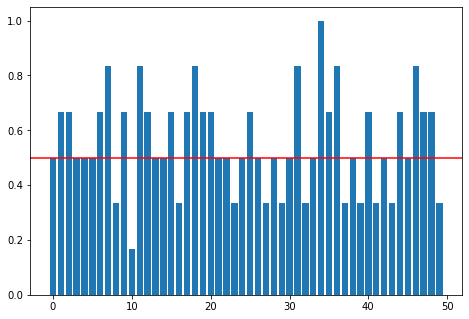

Num de acc que pasa de 0.5:  22
**************************************************** 0.2
     --
     Bad accu
     --
     Bad accu
     --
     Bad accu
     --
     Bad accu
     --
     Pred:  [0 1 0 0 0 0 1 1 0 1 0 0]
     Data:  [1 1 0 1 0 0 1 0 0 0 0 0]
     ACC 0.6666666666666666
     F1 0.5
     Recal 0.5
     Precision 0.5
     --
     Bad accu
     --
     Pred:  [0 0 0 0 0 0 0 0 0 0 0 1]
     Data:  [0 1 1 1 1 0 0 0 0 0 0 1]
     ACC 0.6666666666666666
     F1 0.33333333333333337
     Recal 0.2
     Precision 1.0
     --
     Pred:  [0 0 1 0 0 0 0 0 0 0 1 0]
     Data:  [0 0 1 1 0 0 1 0 0 0 1 0]
     ACC 0.8333333333333334
     F1 0.6666666666666666
     Recal 0.5
     Precision 1.0
     --
     Pred:  [0 0 1 0 0 0 1 0 0 1 0 0]
     Data:  [0 0 1 1 0 0 1 0 1 0 0 0]
     ACC 0.75
     F1 0.5714285714285715
     Recal 0.5
     Precision 0.6666666666666666
     --
     Pred:  [0 0 0 1 0 0 1 1 0 0 0 0]
     Data:  [1 0 0 0 0 0 0 0 1 0 0 0]
     ACC 0.5833333333333334
     F1 0.

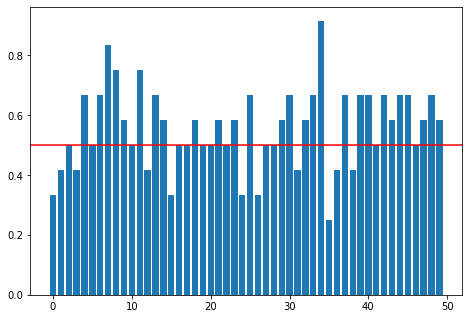

Num de acc que pasa de 0.5:  27
**************************************************** 0.3
     --
     Bad accu
     --
     Pred:  [1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0]
     Data:  [1 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0]
     ACC 0.6111111111111112
     F1 0.4615384615384615
     Recal 0.375
     Precision 0.6
     --
     Pred:  [0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1]
     Data:  [1 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 1 1]
     ACC 0.6111111111111112
     F1 0.4615384615384615
     Recal 0.3
     Precision 1.0
     --
     Bad accu
     --
     Bad accu
     --
     Bad accu
     --
     Bad accu
     --
     Pred:  [0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
     Data:  [0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1]
     ACC 0.6111111111111112
     F1 0.22222222222222224
     Recal 0.14285714285714285
     Precision 0.5
     --
     Pred:  [0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0]
     Data:  [0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0]
     ACC 0.5555555555555556
     F1 0.20000000000000004
     Recal 0.2
     Precisi

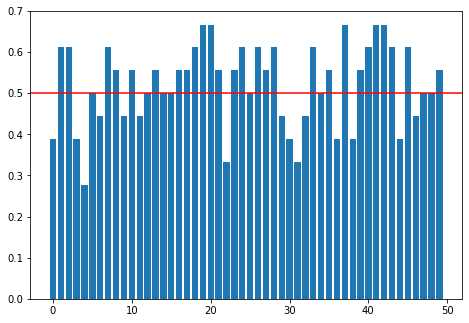

Num de acc que pasa de 0.5:  27
**************************************************** 0.4
     --
     Bad accu
     --
     Pred:  [0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0]
     Data:  [0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1]
     ACC 0.625
     F1 0.30769230769230765
     Recal 0.2
     Precision 0.6666666666666666
     --
     Bad accu
     --
     Bad accu
     --
     Bad accu
     --
     Pred:  [0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1]
     Data:  [0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1]
     ACC 0.625
     F1 0.5263157894736842
     Recal 0.5555555555555556
     Precision 0.5
     --
     Bad accu
     --
     Bad accu
     --
     Pred:  [1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1]
     Data:  [1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1]
     ACC 0.625
     F1 0.5263157894736842
     Recal 0.625
     Precision 0.45454545454545453
     --
     Pred:  [0 1 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0]
     Data:  [0 1 0 0 1 1 0 0 0 1 0 0

In [19]:
#https://d1rwhvwstyk9gu.cloudfront.net/2020/02/XG-Boost-FINAL-01.png 
xin = list(range(60))
for i in range(1,8):
    print("**************************************************** "+'0.'+str(i)) #PRINT THE PARTITION OF THE DATA
    numpase = 0 #COUNTER OF THE EPOCHS THAT PAS THE 0.55 ACCURACY
    accur = [] #SAVE THE ACCURACY
    for t in range(0,60):
        print("     --")
        c = list(zip(X3, Lavels3)) # Zip so went we shuffle it dosent disarrange
        random.shuffle(c) #MIXT DATA
        DX, DY = zip(*c) #UNZIP
        DX = np.array(DX) #TRANSFORM TO ARRAY
        DY = np.array(DY)
        trainX, testX, trainY, testY = train_test_split(DX, DY, test_size=float('0.'+str(i))) #DEVIDE DATA
        X_train = (trainX - np.mean(trainX)) / np.std(trainX) #STANDARIZE DATA
        X_test = (testX - np.mean(testX)) / np.std(testX) #STANDARIZE DATA

        xgb_model = xgb.XGBClassifier(max_depth=5,learning_rate=0.1,n_estimators=50,
                                        objective='binary:logistic',booster='gbtree',n_jobs=10,
                                        subsample=0.9, colsample_bytree=0.9, colsample_bylevel=0.9,
                                        reg_alpha=0.5, reg_lambda=1.0,gamma=0,
                                        scale_pos_weight=1)
        xgb_model.fit(X_train,trainY)
        predY = xgb_model.predict(X_test)
        if float(accuracy_score(y_true=testY, y_pred=predY))>0.55:
            print('     Pred: ', predY)
            print('     Data: ', testY)
            print("     ACC",accuracy_score(y_true=testY, y_pred=predY))
            print("     F1",f1_score(y_true=testY, y_pred=predY))
            print("     Recal",recall_score(y_true=testY,y_pred=predY))
            print("     Precision",precision_score(y_true=testY, y_pred=predY))
            numpase=numpase+1
            accur.append(float(accuracy_score(y_true=testY, y_pred=predY)))            
        else:
            accur.append(float(accuracy_score(y_true=testY, y_pred=predY)))
            print('     Bad accu')
    if numpase>25:
        fig = plt.figure()
        ax = fig.add_axes([0,0,1,1])
        plt.axhline(y=0.5, color='r', linestyle='-')
        ax.bar(xin,accur)
        plt.show()
    else:
        print('************************************************ The half of the iterations dont past the .6 accur')
    print('Num de acc que pasa de 0.5: ',numpase)

In [ ]:
PCA